# Introduction to the dataset

- World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases.

- Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 

- The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

- This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

# 1.1 Load the libraries:

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preparation



The dataset is publically available and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.  The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# 1.2 Read the dataset(US_Heart_Patients.csv):

In [88]:
df = pd.read_csv("G:/Machine_L/Logistic & linear regression/Faculty_Notebook/US_Heart_Patients.csv")

# Exploratory analysis of the dataset:

In [89]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- I am dropping the education column, hence such a way that there is no significant effect on my target by this attribute.

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

 - **Demographic:**
sex: male or female;(Nominal)

    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 - **Behavioural**

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)

    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

 - **Medical( history):**

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)

    -  diabetes: whether or not the patient had diabetes (Nominal)

 - **Medical(current):** 

    -  totChol: total cholesterol level (Continuous)

    -  sysBP: systolic blood pressure (Continuous)

    -  diaBP: diastolic blood pressure (Continuous)

    -  BMI: Body Mass Index (Continuous)

    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    -  glucose: glucose level (Continuous)


 - **Predict variable (desired target):**

    -  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [90]:
df.shape

(4240, 16)

In [91]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [93]:
df.drop('education', axis =1 , inplace = True)

In [94]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [95]:
df.dropna( axis = 0, inplace = True)

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.

In [96]:
df.shape

(3751, 15)

In [97]:
df.rename(columns = {'male' : 'Gender'}, inplace = True)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

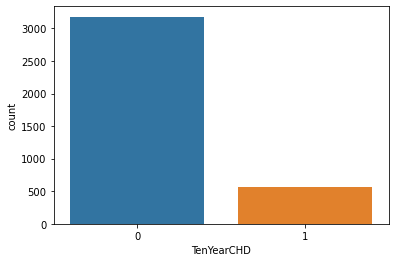

In [98]:
sns.countplot(x = 'TenYearCHD', data=df )

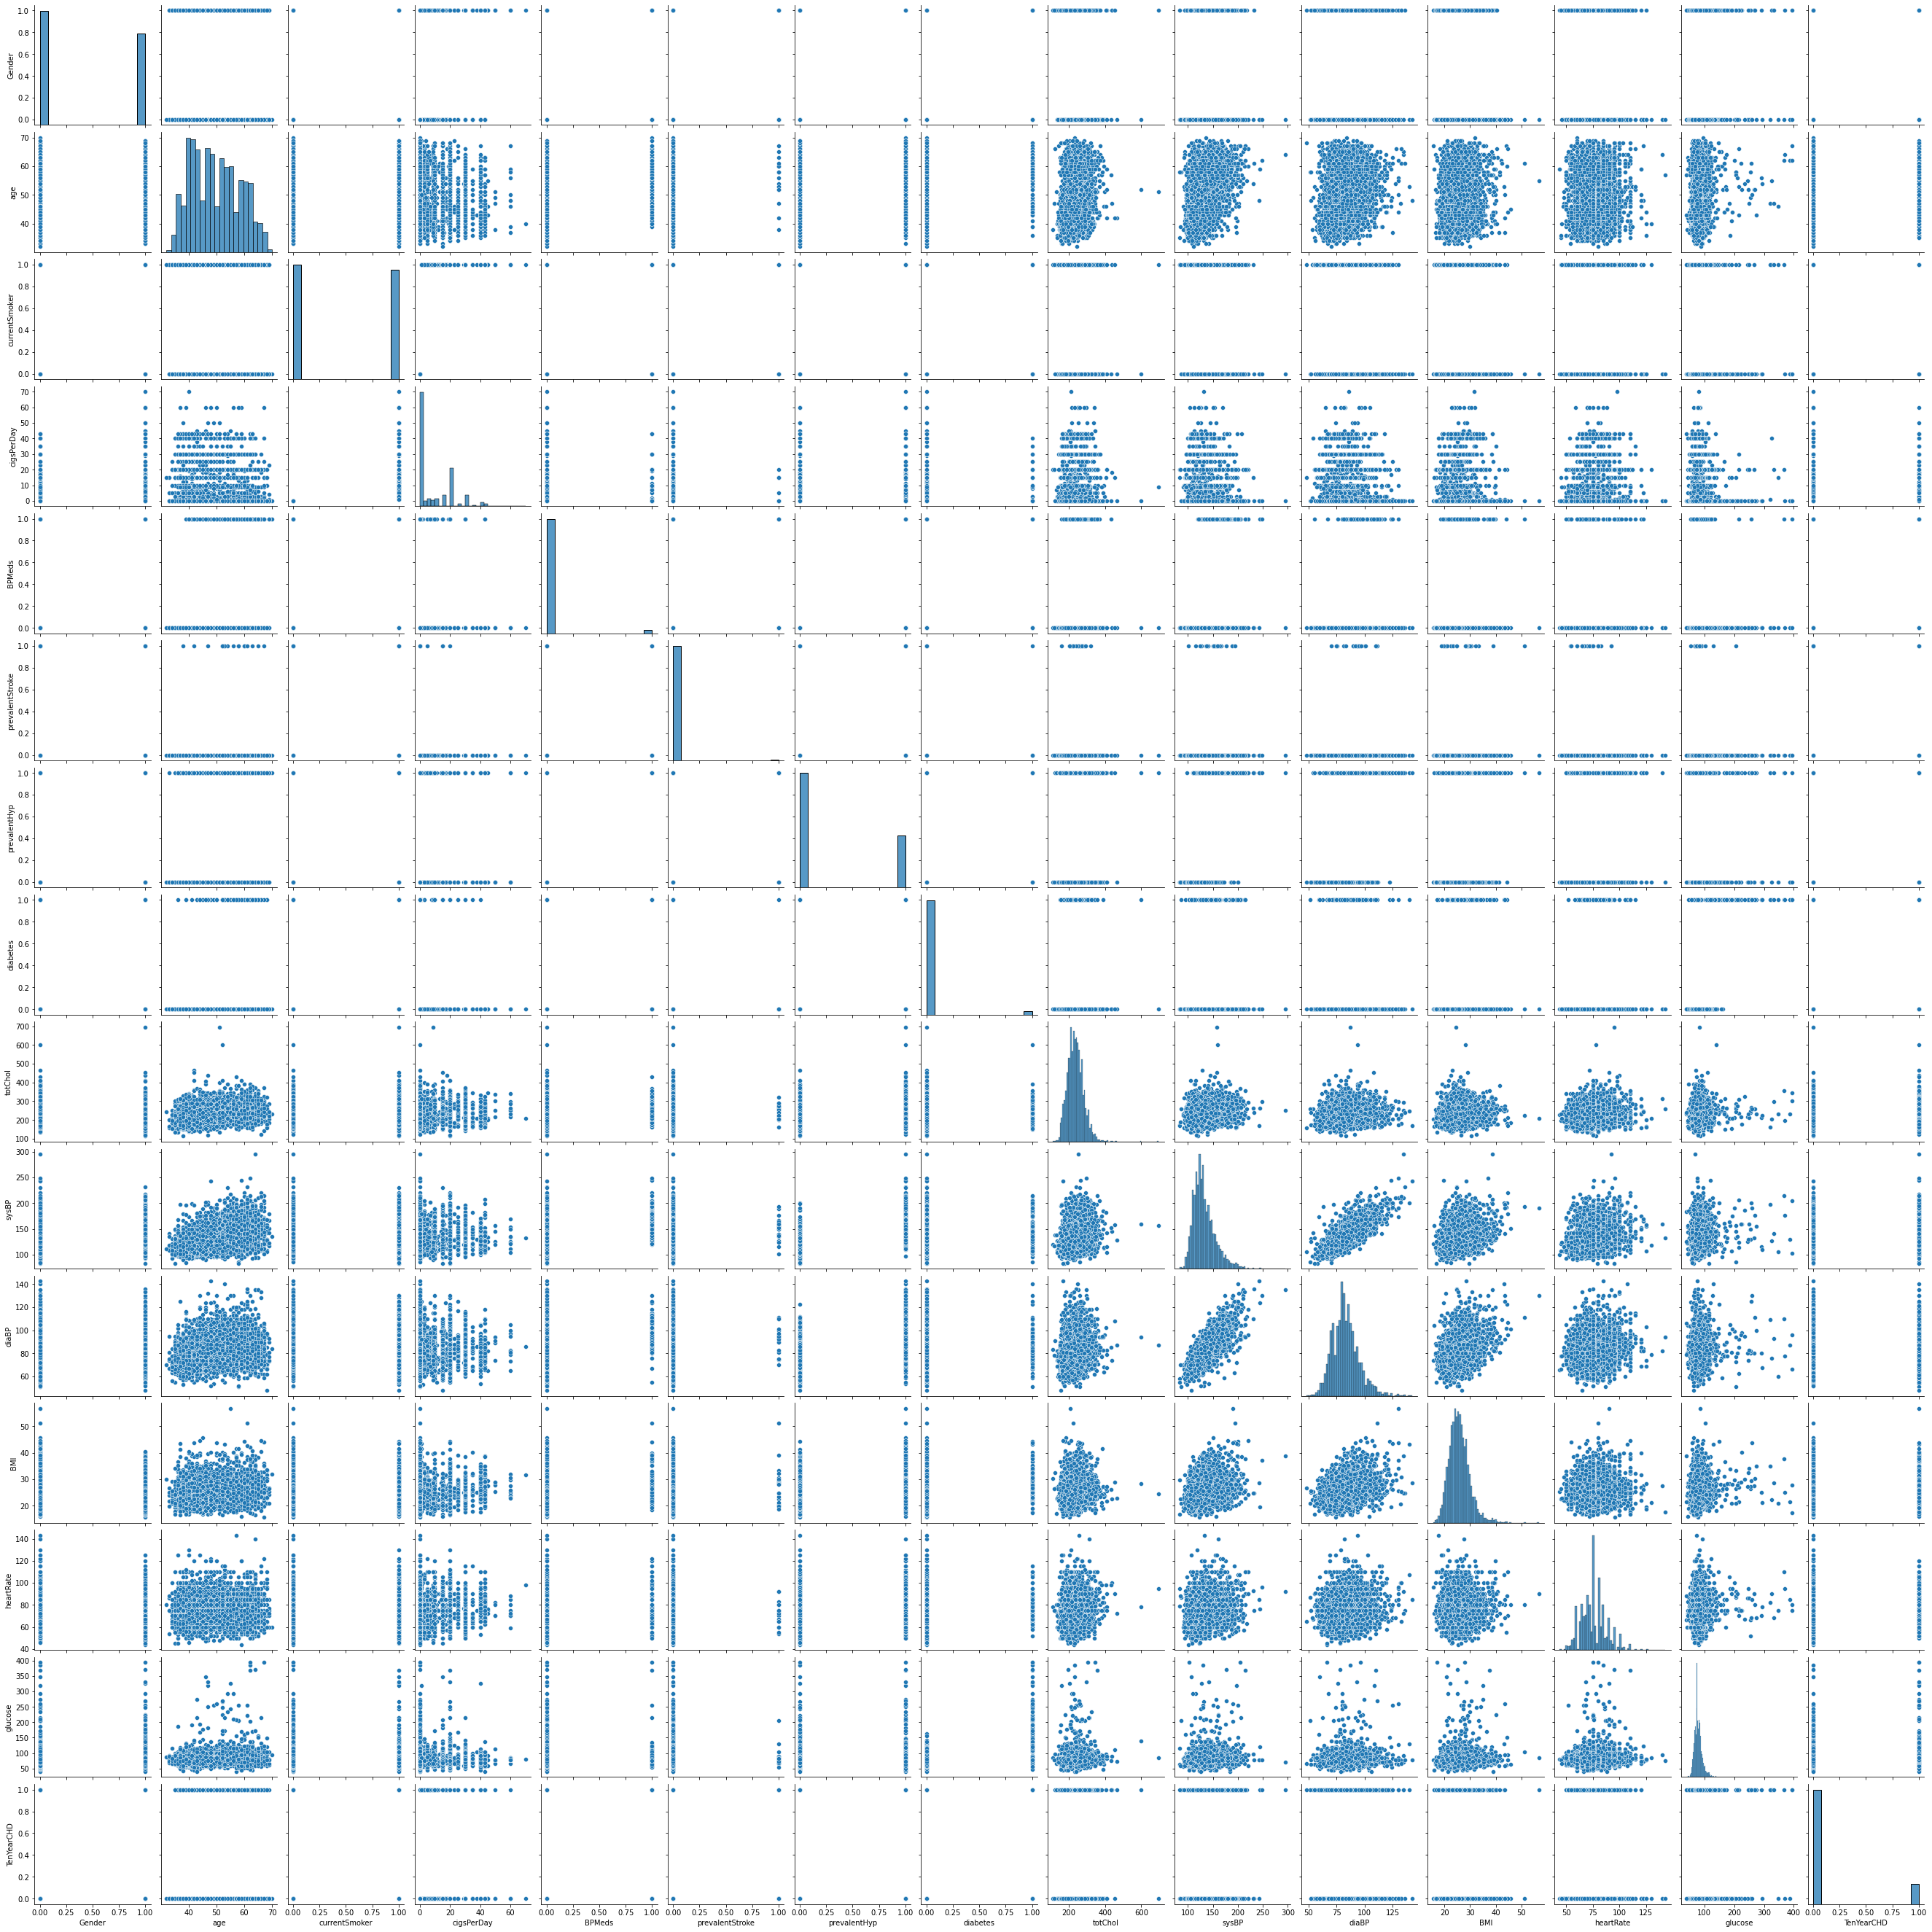

In [99]:
sns.pairplot(df)

# Analyse the Descriptive statistics of the dataset:

In [13]:
df.corr()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.024142,0.203215,0.325886,-0.052355,-0.002513,0.003588,0.011834,-0.067595,-0.044515,0.053890,0.074868,-0.115444,0.003130,0.096000
age,-0.024142,1.000000,-0.211338,-0.188804,0.131690,0.050018,0.305292,0.109321,0.261443,0.388280,0.205191,0.136428,-0.005893,0.118529,0.231584
currentSmoker,0.203215,-0.211338,1.000000,0.773259,-0.051816,-0.037573,-0.105258,-0.045308,-0.049945,-0.133154,-0.114118,-0.165404,0.054924,-0.054078,0.021709
cigsPerDay,0.325886,-0.188804,0.773259,1.000000,-0.046625,-0.035713,-0.067470,-0.039436,-0.030600,-0.092310,-0.056202,-0.090525,0.067194,-0.055090,0.055920
BPMeds,-0.052355,0.131690,-0.051816,-0.046625,1.000000,0.111601,0.262955,0.056337,0.089625,0.269479,0.199282,0.105128,0.010228,0.052464,0.084740
prevalentStroke,-0.002513,0.050018,-0.037573,-0.035713,0.111601,1.000000,0.065169,0.009423,0.012297,0.060421,0.055189,0.035568,-0.016673,0.015789,0.047684
prevalentHyp,0.003588,0.305292,-0.105258,-0.067470,0.262955,0.065169,1.000000,0.082030,0.164645,0.697849,0.616753,0.303411,0.142013,0.085776,0.178615
diabetes,0.011834,0.109321,-0.045308,-0.039436,0.056337,0.009423,0.082030,1.000000,0.047453,0.104393,0.051761,0.093098,0.063370,0.616087,0.093222
totChol,-0.067595,0.261443,-0.049945,-0.030600,0.089625,0.012297,0.164645,0.047453,1.000000,0.216375,0.169811,0.119651,0.094795,0.046902,0.089613
sysBP,-0.044515,0.388280,-0.133154,-0.092310,0.269479,0.060421,0.697849,0.104393,0.216375,1.000000,0.785853,0.330484,0.181381,0.132878,0.220108


# Fix the Target variable and dependent features:

In [14]:
X = df.drop('TenYearCHD', axis =1)
Y = df['TenYearCHD']

In [15]:
X.shape

(3751, 14)

In [16]:
Y.shape

(3751,)

In [17]:
X1 = sm.add_constant(X)

In [18]:
X1.head()

,const,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


# Apply the Logit model to the Variables and eleminate the features that are above p_value: 0.05

In [19]:
model = sm.Logit(Y,X1)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Thu, 19 Aug 2021   Pseudo R-squ.:                  0.1170
Time:                        09:00:22   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Gender              0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [20]:
def back_feature_elem(Y,X):
    while len(X)>0:
        model = sm.Logit(Y,X)
        result = model.fit(disp =0)
        large_pval = round(result.pvalues, 3).nlargest(1)
        if large_pval[0]<(0.05):
            return result
            break
        else:
            X = X.drop(large_pval.index)

In [21]:
large_pval = round(result.pvalues, 3).nlargest(10)
large_pval


diabetes           0.994
currentSmoker      0.633
heartRate          0.583
BPMeds             0.533
diaBP              0.533
BMI                0.408
prevalentStroke    0.141
prevalentHyp       0.116
totChol            0.037
cigsPerDay         0.003
dtype: float64

In [22]:
final_x = X1.drop(['const','diabetes', 'currentSmoker', 'heartRate', 'BPMeds', 'diaBP', 'BMI', 'prevalentStroke', 'prevalentHyp'], axis =1)

In [35]:
x_PM = df[['Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose']]

In [36]:
Y1 = df['TenYearCHD']

# Final dependent variables to be included for the further analysis

In [37]:
x_PM.head()

,Gender,age,cigsPerDay,sysBP,glucose
0,1,39,0.0,106.0,77.0
1,0,46,0.0,121.0,76.0
2,1,48,20.0,127.5,70.0
3,0,61,30.0,150.0,103.0
4,0,46,23.0,130.0,85.0


# Scaling the features so that it becomes unitless and can be useful to the distance and weight based models:

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
X_PMS = sc.fit_transform(x_PM)

# Importing the scikt learn models to identify the best fit model: 

In [50]:
LR = LogisticRegression()
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
NB = GaussianNB()

# Getting the required hyperparameter values to pass on to the models using GridSearchCV 

In [46]:
DT = DecisionTreeClassifier()
Knn = KNeighborsClassifier()
RF = RandomForestClassifier()
Dt_param = {'criterion':['entropy', 'gini']}
param = {'n_neighbors': np.arange(1,1000), 'weights':['uniform', 'distance']}
GS = GridSearchCV(Knn, param, cv=10, scoring='roc_auc')
GS_dt = GridSearchCV(DT, Dt_param, cv=10, scoring='roc_auc')
GS.fit(X_PMS, Y1)
GS_dt.fit(X_PMS, Y1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

# Best parameters for KNN:

In [47]:
GS.best_params_

{'n_neighbors': 110, 'weights': 'uniform'}

# Best parameters for Decision Tree:

In [48]:
GS_dt.best_params_

{'criterion': 'entropy'}

# Passing the hyperparameters to the different models:

In [76]:
DT_final = DecisionTreeClassifier(criterion='entropy', random_state=0)
RF_final = RandomForestClassifier(n_estimators=10, random_state=0)
Knn_final = KNeighborsClassifier(n_neighbors= 110 , weights = 'uniform')
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
#Bagging models
Knn_bag= BaggingClassifier(base_estimator=Knn_final, n_estimators=10, random_state=0)
LR_bag= BaggingClassifier(base_estimator=LR, n_estimators=3, random_state=0)
NB_bag= BaggingClassifier(base_estimator=NB, n_estimators=10, random_state=0)
DT_bag = BaggingClassifier(base_estimator=DT_final, n_estimators=10, random_state=0)
#Boosting Models
LR_boost= AdaBoostClassifier(base_estimator=LR, n_estimators=50, random_state=0)
NB_boost= AdaBoostClassifier(base_estimator=NB, n_estimators=50, random_state=0)
RF_boost= AdaBoostClassifier(base_estimator=RF_final, n_estimators=50, random_state=0)
DT_boost= AdaBoostClassifier(base_estimator=DT_final, n_estimators=50, random_state=0)
Gboost= GradientBoostingClassifier(n_estimators=150)

In [77]:
models = []
models.append(('LogisticR', LR))
models.append(('NVB', NB))
models.append(('DecisionTree', DT_final))
models.append(('RandomForest', RF_final))
models.append(('KnearestNeighbors', Knn_final))
models.append(('Bagged KNN', Knn_bag))
models.append(('LR bagged', LR_bag))
models.append(('NB bagged', NB_bag))
models.append(('DT bagged', DT_bag))
models.append(('LR Boost', LR_boost))
models.append(('NB Boost', NB_boost))
models.append(('DT Boost', DT_boost))
models.append(('RF Boost', RF_boost))
models.append(('GradientBoost', Gboost))

# Using KFold validation for model selection depending upon the bais error and variance error

LogisticR: 0.731385 (0.001863)
NVB: 0.722893 (0.001579)
DecisionTree: 0.549484 (0.000829)
RandomForest: 0.632350 (0.000918)
KnearestNeighbors: 0.727238 (0.001654)
Bagged KNN: 0.725477 (0.001602)
LR bagged: 0.731582 (0.001873)
NB bagged: 0.723363 (0.001571)
DT bagged: 0.644150 (0.001100)
LR Boost: 0.730856 (0.001853)
NB Boost: 0.558960 (0.004414)
DT Boost: 0.634567 (0.001181)
RF Boost: 0.646599 (0.000790)
GradientBoost: 0.707927 (0.001571)


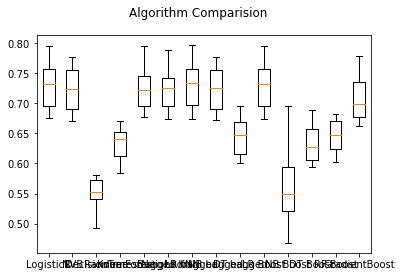

In [78]:
from sklearn import model_selection
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True, n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_PMS, Y1, cv= kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, np.mean(cv_results), np.var(cv_results,ddof=1)))
#boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Since LogisticRegression has less bais error and less variance error compared to all other models. I can conclude that LogisticRegression would be the best suitable model

## Further tuning the model for better accuracy using bagging Classifier to reduce the bais error:

[0.0013436517613882016, 0.0010587501961488966, 0.000977210233058276, 0.0011417784193447594, 0.001085191151978504, 0.0010807400557580262, 0.0011135459166644508, 0.0010798542831238767, 0.0011047675661865594, 0.0010823740422447018, 0.001106048374814508, 0.001083604463506529, 0.0011769186614026049, 0.0011638973596018666, 0.0011357658695526848, 0.0011372048487974832, 0.0011448415157456731, 0.0011267956304270158, 0.001158021061837305, 0.0011316173588824668, 0.0011255797697110141, 0.0011193951477012688, 0.0011270700554926215, 0.001120765347639054, 0.0011188054025272015, 0.0011439757370148831, 0.0011445173722551612, 0.001134308210219119, 0.0011422975470717505, 0.001161206448340049, 0.0011285656213480125, 0.0011477511949538432, 0.0011683401313367068, 0.0011274743015164043, 0.0011275478854826401, 0.0011337201502403635, 0.001148174098679789, 0.0011393036763982813, 0.0011236966744047308, 0.0011178925709221, 0.0011485924868442888, 0.0011468034770222393, 0.0011331423562985967, 0.0011232974832352523,

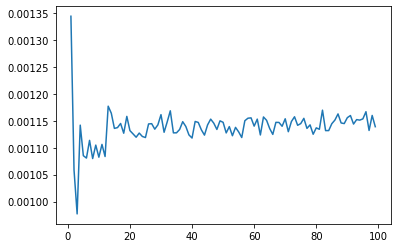

In [60]:
#Tuning n_estimator for Bagged Logistic_Regression
auc_val = []
for val in np.arange(1,100):
    LR_bag = BaggingClassifier(base_estimator=LR, n_estimators=val)
    Kfold= model_selection.KFold(shuffle=True, n_splits=15, random_state=0)
    result = model_selection.cross_val_score(LR_bag, X_PMS, Y1, cv=15, scoring='roc_auc')
    auc_val.append(np.var(result, ddof=1))
print(auc_val)
x= np.arange(1,100)
plt.plot(x,auc_val)

## Minimum value to pass on to the n_estimator hyperparameter of Bagging Classifier:

In [62]:
np.argmin(auc_val)

2

## Training the model and testing it on the production side.

In [156]:
xtrain, xtest, ytrain, ytest = train_test_split(xf,Y, test_size = 0.3, random_state = 2)

In [157]:
model = LogisticRegression()

In [158]:
model.fit(xtrain,ytrain)

LogisticRegression()

## predicted values from the model:

In [159]:
y_pred = model.predict(xtest)

In [160]:
from sklearn import metrics

# Accuracy of the model

In [161]:
acc = metrics.accuracy_score(ytest, y_pred)
print(acc*100)

85.34635879218473


# Confusion matrix Showing the type 1 and type 2 error

In [162]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[946   8]
 [157  15]]


In [163]:
ytest.value_counts()

0    954
1    172
Name: TenYearCHD, dtype: int64

# True Positive Rate 

In [164]:
TPR = cm[1,1]/cm[1,:].sum() #Sensitivity
TPR

0.0872093023255814

# True Negative Rate

In [165]:
#Specificity
TNR = cm[0,0]/cm[0,:].sum()
TNR

0.9916142557651991

# Type 1 error

In [166]:
alpha_error = 1 - TNR
alpha_error

0.008385744234800874

# Type 2 error

In [167]:
beta_error = 1 - TPR
beta_error

0.9127906976744186

# model Coefficients of Logistic Regression:

In [168]:
np.round(model.coef_,4)

array([[0.518 , 0.0712, 0.0159, 0.0172, 0.007 ]])

## Conclusion:
By Exploring the dataset I have understood that the features that are affecting a patient with 10-year risk of future coronary heart disease (CHD) are as follows : 'Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose' . And I have considered multiple models to predict the objective, out of which i have done the model selection by considering the bais and variance error and found out that the Logistic Regression is the best suited model.

## <font color= red> Final Insights:</font>


- **<font color=darkblue>All attributes selected after the elimination process show Pvalues lower than 5% and 
thereby suggesting significant role in the Heart disease prediction.</font>** 
 

- **<font color=darkblue>Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes 
smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.</font>**


- **<font color=darkblue>Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence 
of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)</font>**
 

- **<font color=darkblue>The model predicted with 0.85 accuracy. The model is more specific than sensitive.</font>**


- **<font color=darkblue>Overall model could be improved with more data.</font>**